**Introduction**

This report provides a detailed examination of data mining techniques, specifically focusing on cluster analysis, to study California's housing market. The primary goal is to apply hierarchical and K-means clustering methods to uncover patterns and segments within the housing data. The study begins with importing and examining the dataset, followed by more detailed analyses using different clustering techniques.


**Data Import and Initial Analysis**

Importing Libraries

The analysis begins by importing several essential Python libraries, each serving a specific role in the data analysis workflow:

Pandas (pandas) and NumPy (numpy) are used for data manipulation and numerical calculations.

Matplotlib (matplotlib.pyplot) and Seaborn (seaborn) provide extensive capabilities for data visualization.

Statsmodels (statsmodels.api and statsmodels.formula.api) offers classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests.

SciPy (scipy.cluster.hierarchy) is used for hierarchical clustering algorithms.
Scikit-learn (sklearn.cluster, sklearn.metrics, sklearn.preprocessing) provides tools for data mining and data analysis, including clustering and scaling techniques.

Kneed (kneed.KneeLocator) is utilized to detect the knee point on curves, which is particularly useful for determining the optimal number of clusters in K-means clustering.

Collections (collections.Counter) helps with counting the occurrences of items, useful in tallying up labels or results.

In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from statsmodels.formula.api import ols
from collections import Counter

**Loading the Dataset**

The dataset, sourced from a CSV file named 'ST83519_california_housing.csv', is loaded into a DataFrame called housing_df using Pandas' read_csv function. This step initializes the dataset for subsequent operations.

In [3]:
housing_df = pd.read_csv('ST83519_california_housing.csv')

**Preliminary Data Inspection**

Following the loading of the data, two key functions are executed to gain an initial understanding of the dataset's structure:

housing_df.info(): This method is called to output a concise summary of the DataFrame, providing a quick overview of the total number of entries, the existence of null values in each column, and the data types of each column.

housing_df.shape: This attribute of the DataFrame returns a tuple representing the dimensionality of the DataFrame, showing the total number of rows and columns.

In [121]:
housing_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    int64  
 1   total_rooms         300 non-null    int64  
 2   total_bedrooms      300 non-null    int64  
 3   population          300 non-null    int64  
 4   households          300 non-null    int64  
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    int64  
 7   labels_k_2          300 non-null    int32  
 8   labels_k_3          300 non-null    int32  
 9   labels_k_4          300 non-null    int32  
dtypes: float64(1), int32(3), int64(6)
memory usage: 20.0 KB


In [122]:
housing_df.shape

(300, 10)

**Data Overview**

The dataset contains the following columns with their respective data types:

housing_median_age: int64 (median age of housing in the area)

total_rooms: int64 (total number of rooms in the area)

total_bedrooms: int64 (total number of bedrooms in the area)

population: int64 (total population in the area)

households: int64 (total number of households in the area)

median_income: float64 (median income of households in the area)

median_house_value: int64 (median house value in the area)

The dataset has 300 entries and no missing values

**Statistical Summary and Initial Visualization**

Visualization of Data Distribution

To better understand the distribution of key numerical features within the Californian housing dataset, histograms are utilized. Histograms provide a visual summary of the data, allowing for the identification of patterns, anomalies, or deviations from expected behavior. This initial visualization helps in comprehending the spread and central tendencies of the dataset’s variables, which is crucial for subsequent analyses.

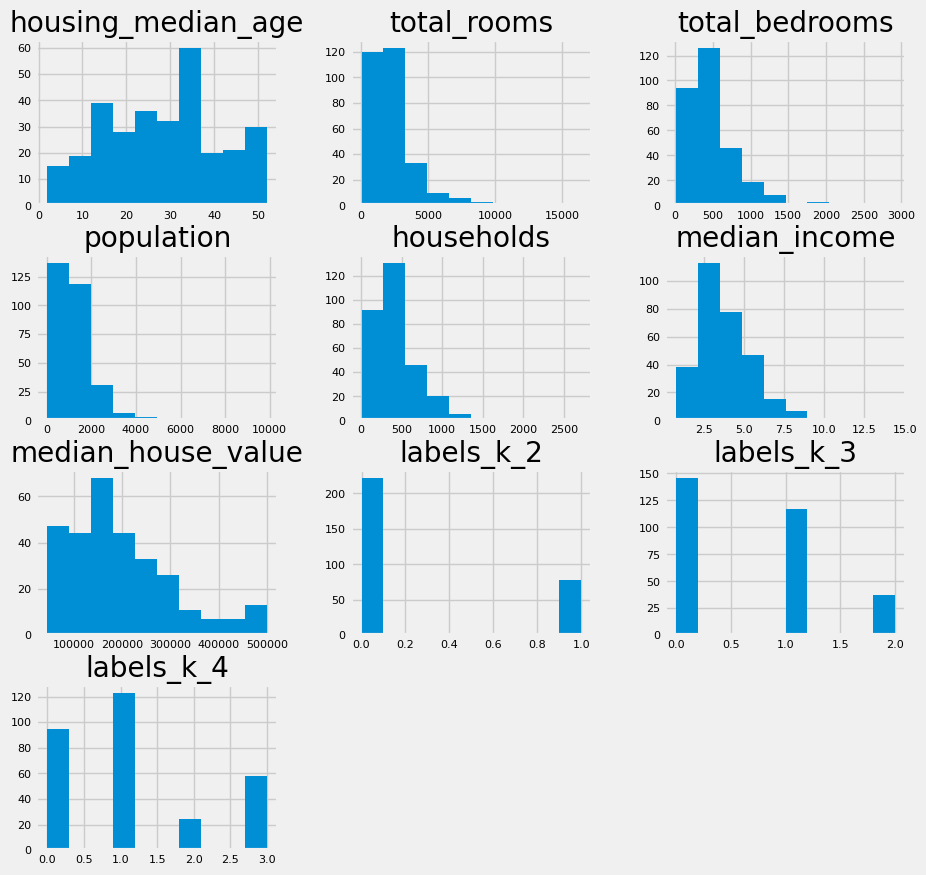

In [125]:
housing_df[housing_df.columns].hist(figsize=(10,10));

**Interpretation of Histograms**

The generated histograms represent the following features:

Housing Median Age: Most of the housing units fall within a certain age range, indicating typical periods of building booms.

*   Housing Median Age: Most of the housing units fall within a certain age range, indicating typical periods of building booms.
*   Total Rooms: The distribution is heavily right-skewed, suggesting that most houses have a smaller number of rooms, with few houses having a very large number of rooms.

*   Total Bedrooms: Similar to total rooms, this feature is also right-skewed, reflecting a commonality in smaller household sizes.
*   Population: This feature shows a right skew, indicating that most blocks have a relatively small population, with a few densely populated blocks.
*   Households: Also right-skewed, showing that most blocks contain fewer households, aligning with the patterns seen in population distribution.
*   Median Income: The distribution of median income is somewhat less skewed than rooms or population, but it still shows that higher incomes are less common.
*   Median House Value: The values are somewhat normally distributed but with a tail on the higher end, suggesting that while most homes are moderately priced, there are some significantly more expensive homes.

These histograms provide a foundational understanding of the data’s structure and distribution, which is instrumental in guiding further detailed analysis, such as clustering or predictive modeling.

In [7]:
housing_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
housing_median_age,300.0,27.99,12.97,2.00,17.00,29.00,36.00,52.00
total_rooms,300.0,2510.99,2083.42,40.00,1359.25,2004.00,2910.25,16414.00
total_bedrooms,300.0,505.68,388.66,8.00,271.75,416.00,599.50,2919.00
population,300.0,1324.72,1092.81,25.00,738.00,1097.00,1543.75,9879.00
households,300.0,459.44,340.79,7.00,259.00,388.00,554.75,2714.00
median_income,300.0,3.80,1.75,0.77,2.61,3.47,4.71,14.42
median_house_value,300.0,199107.70,108712.64,45000.00,114050.00,177600.00,253925.00,500001.00


**Hierarchical Clustering Analysis Using Dendrogram**

**Implementation of Hierarchical Clustering**

To explore potential groupings within the Californian housing dataset, hierarchical clustering was applied using various linkage methods. The Python code snippet below outlines the setup for creating dendrograms from this clustering, which visually represent the arrangement and distance of clusters formed.

The process begins by setting the aesthetic parameters for the visualization to ensure clarity and readability:

In [8]:
S_SIZE = 8
M_SIZE = 12
L_SIZE = 16

plt.rc('font', size=S_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=S_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=M_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=S_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=S_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=S_SIZE)    # legend fontsize
plt.rc('figure', titlesize=L_SIZE)  # fontsize of the figure title

Following the configuration, the linkage function from the SciPy library computes hierarchical clusters using different methods:

In [9]:
linkage_data_single = linkage(housing_df, method='single'  , metric='euclidean')
linkage_data_complete = linkage(housing_df, method='complete' , metric='euclidean')
linkage_data_average = linkage(housing_df, method='average'  , metric='euclidean')
linkage_data_centroid = linkage(housing_df, method='centroid' , metric='euclidean')
linkage_data_ward = linkage(housing_df, method='ward', metric='euclidean')

Each method represents a different strategy for measuring distances between clusters:

*   Single Linkage: Distance between nearest neighbors.
*   Complete Linkage: Distance between farthest neighbors.
*   Average Linkage: Average distance between all members.
*   Centroid Linkage: Distance between the centroids of the clusters.
*   Ward’s Method: Minimization of variance within the clusters.

When evaluating the dendrograms produced by various hierarchical clustering methods using the original, unscaled data, it is important to consider the visibility of clusters, the appropriateness of each method for the specific characteristics of the data. Below, we analyze the results to determine the number of visible clusters for each.


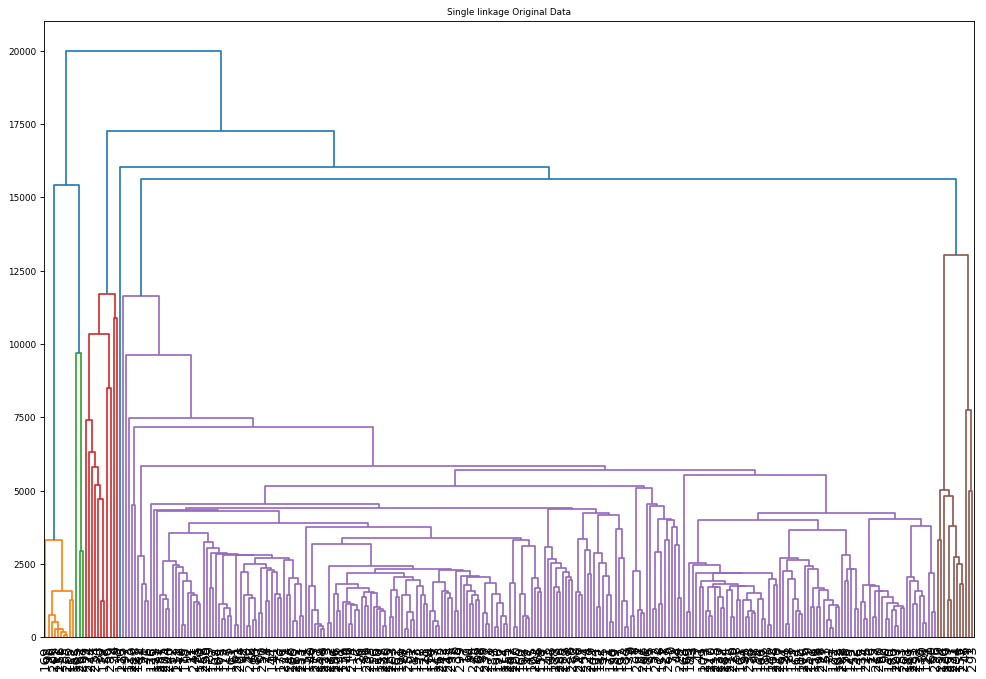

In [10]:
figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_single)
plt.title("Single linkage Original Data")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

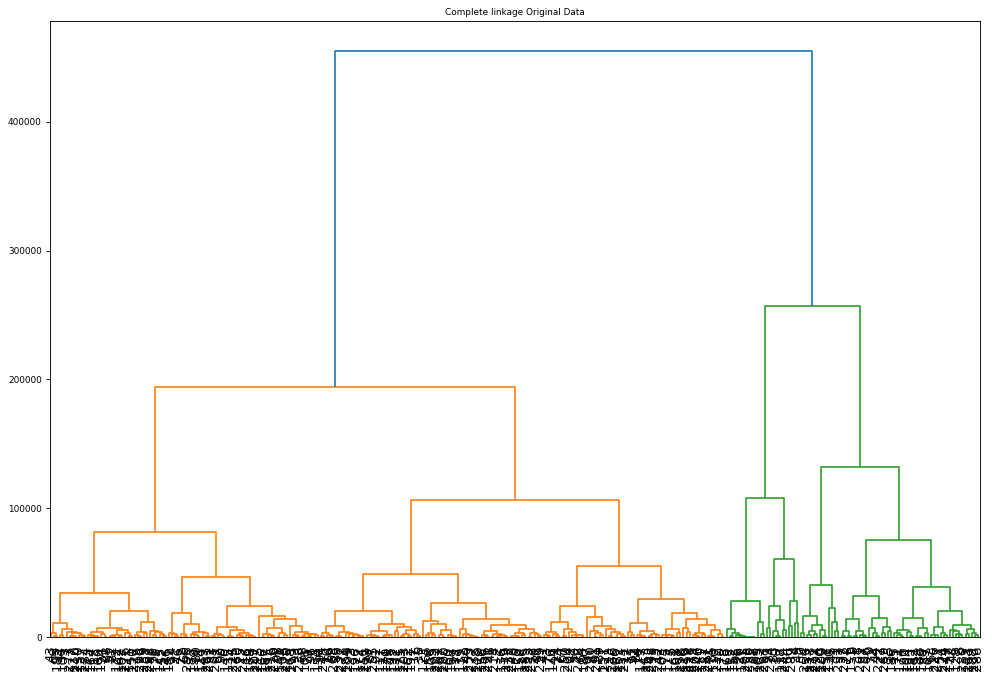

In [11]:
figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_complete)
plt.title("Complete linkage Original Data")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

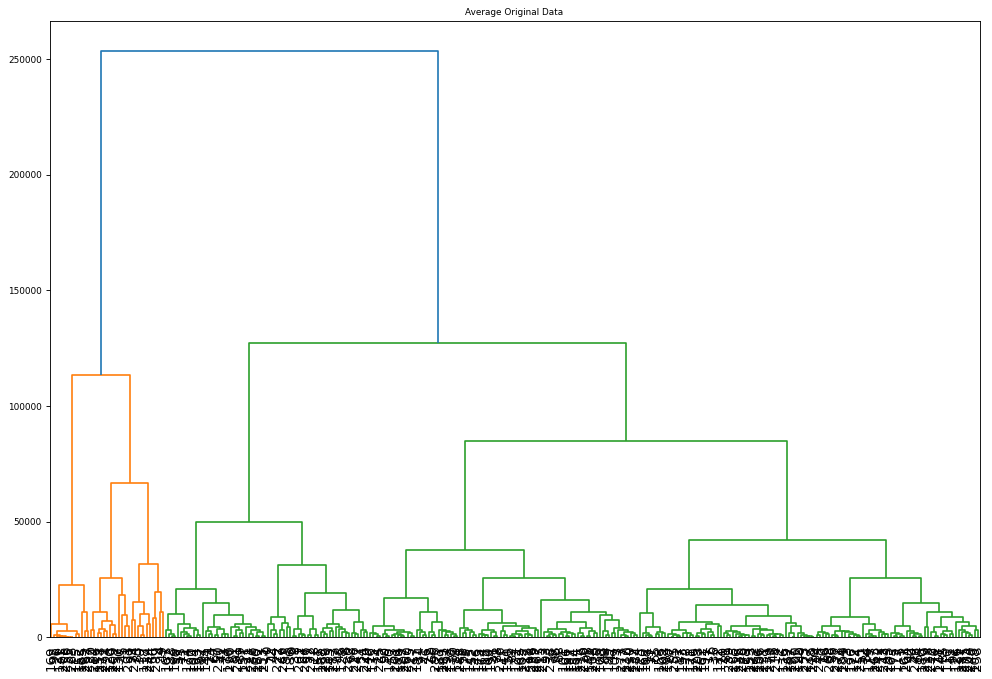

In [12]:
figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_average)
plt.title("Average Original Data")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

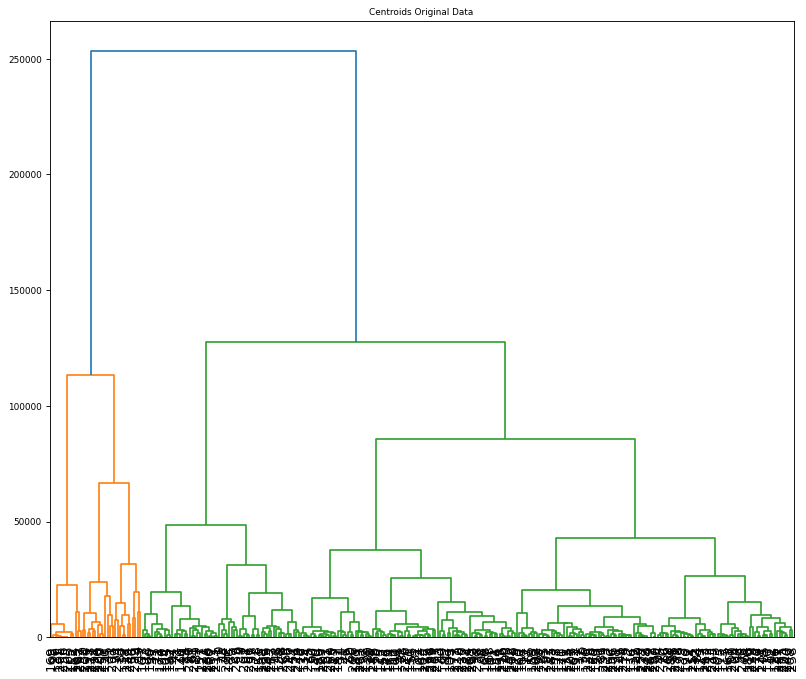

In [13]:
figure(num=None,figsize=(12,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_centroid)
plt.title("Centroids Original Data")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

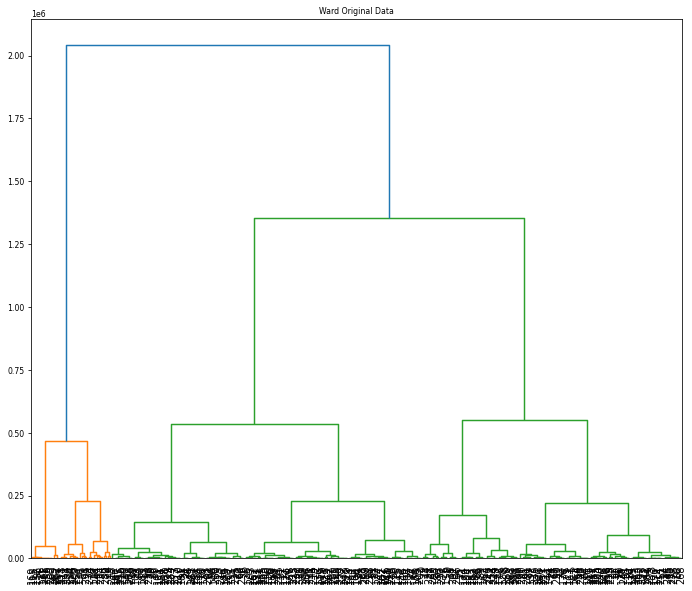

In [14]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_ward)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title("Ward Original Data")
plt.show()

**Analysis of Clustering Results**

Single Linkage Clustering
The dendrogram shows a tendency to form long chains, with one or two major clusters and several smaller or outlying groupings evident at high linkage distances.
The sensitivity to outliers in single linkage can distort the true cluster structure, often resulting in an overestimation of the number of clusters due to the chaining effect.

Complete Linkage Clustering
This method shows a more balanced structure with roughly 2-3 major clusters, where data points are more uniformly distributed within each cluster.
Complete linkage, by considering the maximum distance, tends to avoid chaining and thus forms more meaningful, compact clusters.


Average Linkage Clustering
Average linkage suggests about 3-4 clusters, presenting a balanced view between the sensitivity of single linkage and the robustness of complete linkage.
It offers a middle ground, which might be more representative of the actual data structure for many datasets, especially those without extreme outliers.


Centroid Linkage Clustering
The centroid method illustrates about 3-4 clusters, similar to average linkage, with a tendency to merge clusters based on the proximity of their centroids.
This method can be influenced by the presence of outliers which shift the centroid significantly, potentially leading to less accurate clustering.


Ward’s Method
Ward's method clearly shows about 2-3 major clusters, with a very structured and hierarchical integration of clusters.
This method is particularly useful for creating clusters with a similar number of observations and minimizing within-cluster variance, often producing more actionable clusters.



**Conclusion**

Number of Clusters: Based on the analyzed dendrograms, choosing between 2 to 4 clusters seems reasonable across the different methods, depending on the method and specific data characteristics.

Use of Original Data: Clustering on the original, unscaled data can be influenced by variables with larger scales dominating the distance calculations.


Let's consider normalizing or standardizing data when clusters formed seem biased towards certain high-magnitude variables.

**Standardization and Hierarchical Clustering Analysis Using Normalized Data**

**Standardization Process**

Before applying clustering techniques, the data was standardized using the StandardScaler from scikit-learn, which normalizes each feature to have zero mean and unit variance. This standardization ensures that each variable contributes equally to the distance calculations used in clustering, preventing any one variable with a larger scale from dominating.

In [15]:
scaler = StandardScaler()
mat = housing_df.values
housing_scaled_df = pd.DataFrame(scaler.fit_transform(mat))
housing_scaled_df.columns = list(housing_df.columns)

In [16]:
housing_scaled_df.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.231002,0.355302,0.103923,0.116662,0.122165,0.748514,0.964628
1,-1.080844,0.664925,0.428655,0.151493,0.498390,1.558243,1.560769
2,-1.312619,-0.591356,-0.225964,0.237653,-0.380448,-0.524104,-0.423912
3,1.854972,-0.413948,-0.285240,-0.443381,-0.233485,-0.141602,-0.182507
4,1.236906,0.472613,0.333297,-0.579038,-0.130611,-0.116373,2.337504


In [17]:
housing_scaled_df.shape

(300, 7)

**Clustering Techniques and Dendrograms**

After standardizing the data, various hierarchical clustering methods were applied.

In [18]:
linkage_data_single = linkage(housing_scaled_df, method='single'  , metric='euclidean')
linkage_data_complete = linkage(housing_scaled_df, method='complete' , metric='euclidean')
linkage_data_average = linkage(housing_scaled_df, method='average'  , metric='euclidean')
linkage_data_centroid = linkage(housing_scaled_df, method='centroid' , metric='euclidean')
linkage_data_ward = linkage(housing_scaled_df, method='ward', metric='euclidean')

Each method provides a different strategy for clustering:

*   Single Linkage: Clusters formed by the minimum distance between individual members.
*   Complete Linkage: Clusters formed by the maximum distance between individual members.
*   Average Linkage: Clusters formed by the average distance between all members.
*   Centroid Linkage: Clusters based on the centroids of the clusters.
*   Ward’s Method: Clusters formed by minimizing the total within-cluster variance.

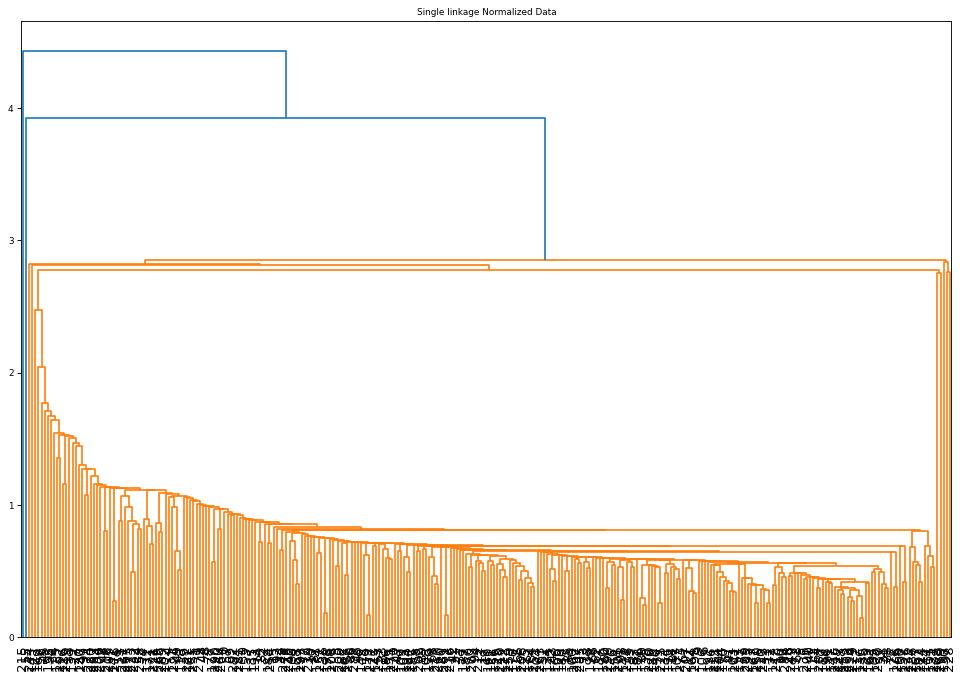

In [19]:
figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_single)
plt.title("Single linkage Normalized Data")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

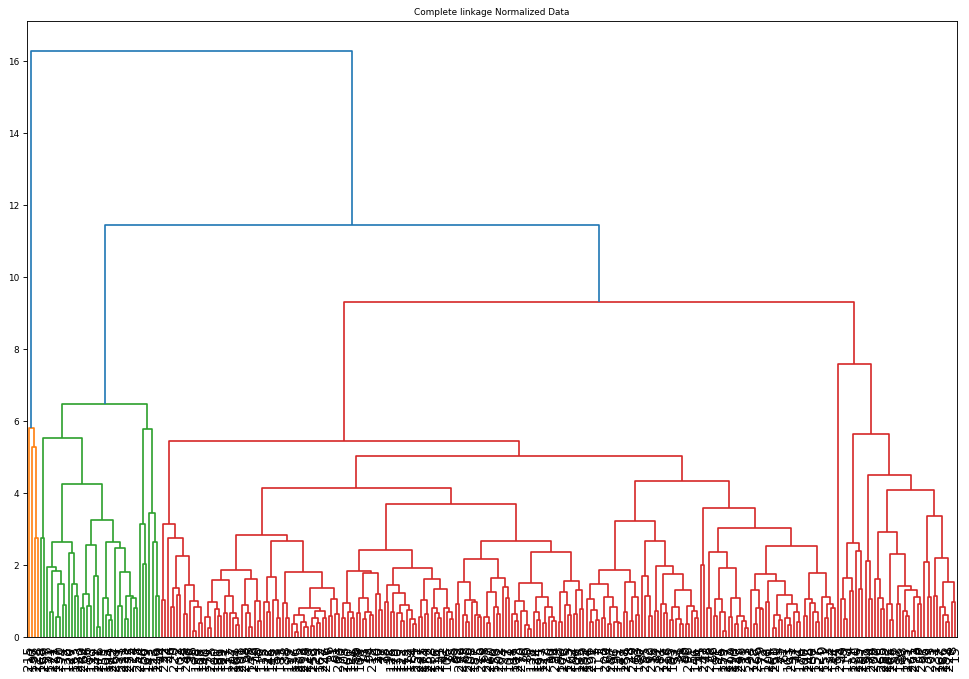

In [20]:
figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_complete)
plt.title("Complete linkage Normalized Data")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

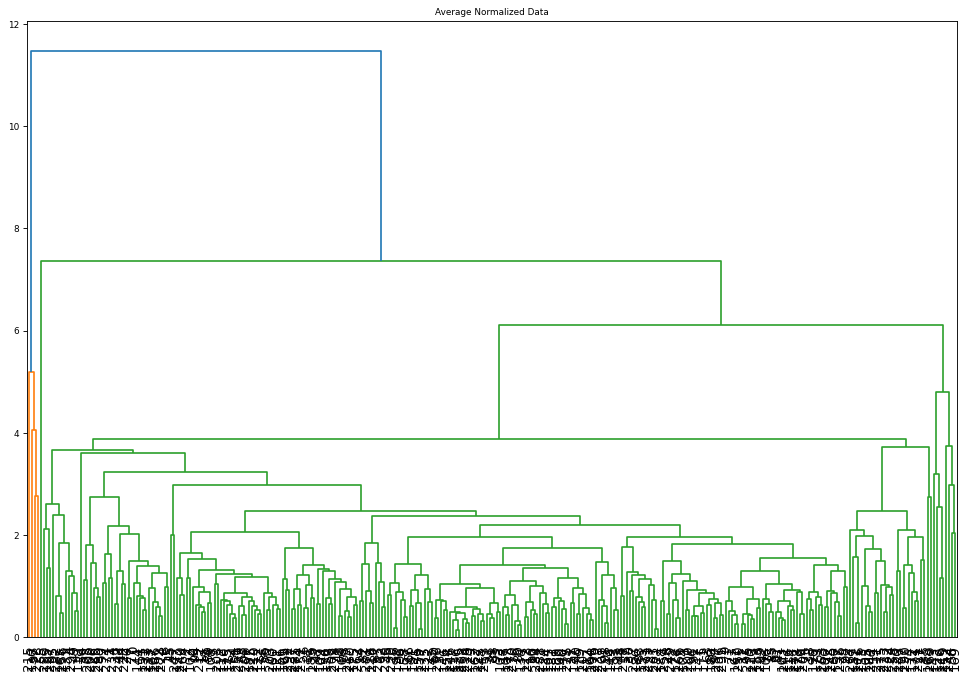

In [21]:
figure(num=None,figsize=(15,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_average)
plt.title("Average Normalized Data")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

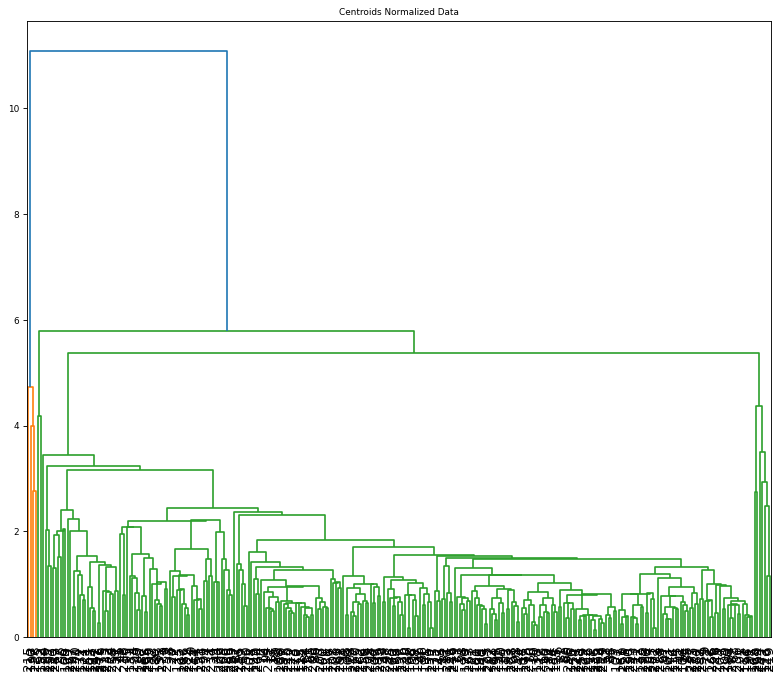

In [22]:
figure(num=None,figsize=(12,10),dpi=80,facecolor='w',edgecolor='k')
dendrogram(linkage_data_centroid)
plt.title("Centroids Normalized Data")
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
plt.show()

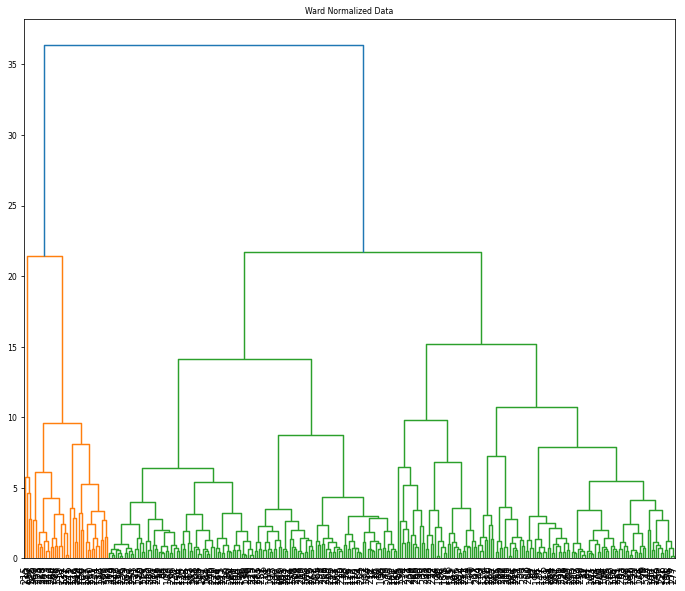

In [23]:
figure(num=None,figsize=(12,10),dpi=70,facecolor='w',edgecolor='k')
dendrogram(linkage_data_ward)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title("Ward Normalized Data")
plt.show()

**Analysis of Clustering Results**

Analyzing the dendrograms generated from each method:

Single Linkage: Displays a clear chaining effect typical of this method, where many individual data points form a large cluster. This method shows two main clusters but with a high degree of chaining.

Complete Linkage: Shows a more structured approach with about 3-4 distinct clusters visible. The clusters are well-separated, indicating robust grouping.

Average Linkage: Similar to complete linkage, it shows 3-4 main clusters with good separation and less susceptibility to outliers compared to single linkage.

Centroid Linkage: Similar to average linkage, with 3-4 clusters visible. This method shows clusters that are somewhat more merged at lower heights, suggesting a moderate sensitivity to cluster centroids.

Ward’s Method: Shows a very distinct structure with 3-4 main clusters and clear separation between them. This method effectively minimizes within-cluster variance, creating balanced clusters.

**Analysis of K-Means Clustering**

**Data Description**

The dataset was processed using K-Means clustering, both on the original scale and with normalized features, to identify distinct groups or segments within the market.

In [24]:
kmeans_k_2 = KMeans(
    init = "random",
    n_clusters = 2,
    n_init = 10,
    max_iter = 300,
    random_state = 42
)
kmeans_k_3 = KMeans(
    init = "random",
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = 42
)
kmeans_k_4 = KMeans(
    init = "random",
    n_clusters = 4,
    n_init = 10,
    max_iter = 300,
    random_state = 42
)
kmeans_scaled_k_2 = KMeans(
    init = "random",
    n_clusters = 2,
    n_init = 10,
    max_iter = 300,
    random_state = 42
)
kmeans_scaled_k_3 = KMeans(
    init = "random",
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = 42
)
kmeans_scaled_k_4 = KMeans(
    init = "random",
    n_clusters = 4,
    n_init = 10,
    max_iter = 300,
    random_state = 42
)

In [25]:
kmeans_k_2.fit(housing_df)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [26]:
kmeans_k_3.fit(housing_df)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [27]:
kmeans_k_4.fit(housing_df)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [28]:
kmeans_scaled_k_2.fit(housing_scaled_df)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [29]:
kmeans_scaled_k_3.fit(housing_scaled_df)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [30]:
kmeans_scaled_k_4.fit(housing_scaled_df)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [31]:
Counter(kmeans_k_2.labels_)

Counter({1: 78, 0: 222})

In [32]:
Counter(kmeans_k_3.labels_)

Counter({1: 117, 2: 37, 0: 146})

In [33]:
Counter(kmeans_k_4.labels_)

Counter({3: 58, 1: 123, 2: 24, 0: 95})

In [34]:
Counter(kmeans_scaled_k_2.labels_)

Counter({1: 262, 0: 38})

In [35]:
Counter(kmeans_scaled_k_3.labels_)

Counter({0: 103, 2: 188, 1: 9})

In [36]:
Counter(kmeans_scaled_k_4.labels_)

Counter({3: 55, 1: 167, 0: 69, 2: 9})

In [37]:
labels_k_2 = kmeans_k_2.labels_
labels_k_3 = kmeans_k_3.labels_
labels_k_4 = kmeans_k_4.labels_
labels_scaled_k_2 = kmeans_scaled_k_2.labels_
labels_scaled_k_3 = kmeans_scaled_k_3.labels_
labels_scaled_k_4 = kmeans_scaled_k_4.labels_

In [38]:
kmeans_k_2.cluster_centers_

array([[2.73063063e+01, 2.37012613e+03, 4.95756757e+02, 1.34501802e+03,
        4.50157658e+02, 3.24137342e+00, 1.46886937e+05],
       [2.99358974e+01, 2.91191026e+03, 5.33910256e+02, 1.26696154e+03,
        4.85846154e+02, 5.40132179e+00, 3.47736026e+05]])

In [39]:
kmeans_k_2.n_iter_
kmeans_k_3.n_iter_

17

In [40]:
housing_df['labels_k_2']=labels_k_2
housing_df['labels_k_3']=labels_k_3
housing_df['labels_k_4']=labels_k_4
housing_scaled_df['labels_k_2']=labels_scaled_k_2
housing_scaled_df['labels_k_3']=labels_scaled_k_3
housing_scaled_df['labels_k_4']=labels_scaled_k_4

In [41]:
housing_df.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_k_2,labels_k_3,labels_k_4
0,25,3250,546,1452,501,5.1084,303800,1,1,3
1,14,3894,672,1490,629,6.5206,368500,1,2,3
2,11,1281,418,1584,330,2.8889,153100,0,0,1
3,52,1650,395,841,380,3.5560,179300,0,1,1
4,44,3494,635,693,415,3.6000,452800,1,2,2


In [42]:
housing_scaled_df.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_k_2,labels_k_3,labels_k_4
0,-0.231002,0.355302,0.103923,0.116662,0.122165,0.748514,0.964628,1,0,3
1,-1.080844,0.664925,0.428655,0.151493,0.498390,1.558243,1.560769,1,0,3
2,-1.312619,-0.591356,-0.225964,0.237653,-0.380448,-0.524104,-0.423912,1,2,1
3,1.854972,-0.413948,-0.285240,-0.443381,-0.233485,-0.141602,-0.182507,1,2,1
4,1.236906,0.472613,0.333297,-0.579038,-0.130611,-0.116373,2.337504,1,0,3


In [43]:
new_df = housing_scaled_df.copy()

# Assign cluster labels to the new DataFrame
new_df['labels_scaled_k_2'] = kmeans_scaled_k_2.labels_
new_df['labels_scaled_k_3'] = kmeans_scaled_k_3.labels_
new_df['labels_scaled_k_4'] = kmeans_scaled_k_4.labels_

# Save DataFrame to a CSV file
new_df.to_csv(r'housing_scaled_with_clusters.csv', index=True)

In [44]:
housing_df['labels_k_2'].value_counts()

labels_k_2
0    222
1     78
Name: count, dtype: int64

In [45]:
housing_df['labels_k_3'].value_counts()

labels_k_3
0    146
1    117
2     37
Name: count, dtype: int64

In [46]:
housing_df['labels_k_4'].value_counts()

labels_k_4
1    123
0     95
3     58
2     24
Name: count, dtype: int64

In [47]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
  }

# A list holds the SSE values for each k
sse = []
centroids = []
scaled_centroids = []
scaled_sse = []
silhouette_coefficients = []
scaled_silhouette_coefficients = []
k_count = []
label_count = []
label_count_scaled = []
iterations = []
iterations_scaled =[]

for k in range(2, 11):
    k_count.append(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(housing_df)
    score = silhouette_score(housing_df, kmeans.labels_)
    silhouette_coefficients.append(score)
    sse.append(kmeans.inertia_)
    centroids.append(kmeans.cluster_centers_)
    label_count.append(Counter(kmeans.labels_))
    iterations.append(kmeans.n_iter_)

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(housing_scaled_df)
    score = silhouette_score(housing_scaled_df, kmeans.labels_)
    scaled_silhouette_coefficients.append(score)
    scaled_sse.append(kmeans.inertia_)
    scaled_centroids.append(kmeans.cluster_centers_)
    label_count_scaled.append(Counter(kmeans.labels_))
    iterations_scaled.append(kmeans.n_iter_)

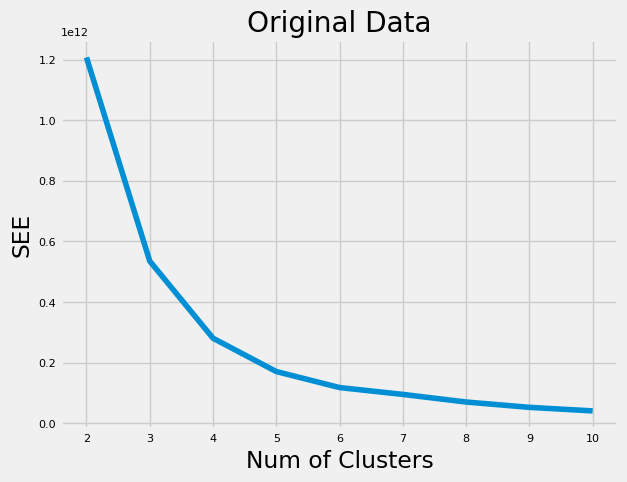

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),sse)
plt.xticks(range(2,11))
plt.title('Original Data')
plt.xlabel("Num of Clusters")
plt.ylabel("SEE")
plt.show()

Original Data: The SSE graph shows a rapid decline as the number of clusters increases from 2 to around 5, suggesting significant improvement in cluster cohesion up to 5 clusters. Beyond this point, the decrease in SSE becomes less pronounced, indicating diminishing returns on increasing the number of clusters.

In [49]:
cluster_results = pd.DataFrame([k_count, label_count, centroids, iterations]).T
cluster_results.columns = ['k', 'label_counts', 'centroids', 'iterations']

In [126]:
cluster_results

,k,label_counts,centroids,iterations
0,2,"{1: 78, 0: 222}","[[27.306306306306304, 2370.1261261261275, 495....",3
1,3,"{1: 117, 2: 37, 0: 146}","[[27.171232876712327, 2154.020547945207, 461.6...",17
2,4,"{3: 58, 1: 123, 2: 24, 0: 95}","[[28.115789473684213, 2114.578947368422, 460.2...",12
3,5,"{0: 43, 1: 84, 3: 24, 4: 65, 2: 84}","[[29.511627906976745, 2989.4883720930234, 546....",17
4,6,"{1: 40, 3: 21, 5: 83, 2: 16, 4: 56, 0: 84}","[[28.666666666666668, 2037.7857142857154, 451....",14
5,7,"{1: 33, 6: 21, 4: 59, 3: 49, 0: 16, 5: 46, 2: 76}","[[37.875, 2863.5625, 518.8125, 1063.9375, 466....",24
6,8,"{0: 33, 3: 21, 1: 56, 4: 43, 6: 16, 5: 44, 7: ...","[[28.575757575757574, 2749.242424242424, 528.2...",22
7,9,"{4: 27, 1: 18, 6: 64, 2: 14, 8: 38, 7: 56, 0: ...","[[27.71794871794872, 2322.6153846153848, 503.6...",19
8,10,"{5: 27, 8: 13, 4: 56, 1: 41, 6: 11, 7: 34, 3: ...","[[28.641025641025642, 1808.3589743589755, 395....",7


The table  provided details the results from a K-Means clustering analysis on a dataset, across a range of cluster sizes from 2 to 10.

Key Components:
k (Number of Clusters): Indicates how many clusters the data was divided into for each run of the algorithm, ranging from 2 to 10.
Label Counts: Shows the distribution of data points across the clusters for each k. For example, at k=5, the distribution is {0: 43, 1: 84, 2: 34, 3: 24, 4: 65}, suggesting that cluster 1 is the largest and cluster 3 is the smallest.

Centroids: These are arrays representing the mean (or centroid) values of the features for each cluster. The centroids help characterize the typical attributes of the data points grouped within each cluster. For instance, the centroid for k=2 is [27.306306306306304, 2370.1261261261275, 495...], which might include average values for features such as price, area, etc.

In [51]:
cluster_results_scaled = pd.DataFrame([k_count, label_count_scaled, scaled_centroids, iterations_scaled]).T
cluster_results_scaled.columns = ['k', 'label_counts', 'centroids', 'iterations']

In [52]:
cluster_results_scaled

,k,label_counts,centroids,iterations
0,2,"{1: 235, 0: 65}","[[-0.8597661126408055, 1.3100747345225536, 1.2...",6
1,3,"{2: 55, 1: 185, 0: 60}","[[-0.9108754550664012, 1.3651352907335574, 1.3...",6
2,4,"{0: 55, 3: 180, 2: 56, 1: 9}","[[0.3983016967909293, -0.1791955027509107, -0....",26
3,5,"{2: 50, 3: 94, 4: 91, 0: 56, 1: 9}","[[-0.7938843024709347, 0.8212565725516836, 0.8...",28
4,6,"{4: 25, 5: 86, 1: 94, 3: 31, 0: 55, 2: 9}","[[-0.8420453258378504, 0.8274556857341164, 0.8...",10
5,7,"{6: 51, 1: 38, 4: 82, 2: 64, 5: 29, 0: 27, 3: 9}","[[-0.7603648247880963, 1.3469403887400735, 1.4...",11
6,8,"{0: 34, 6: 22, 2: 46, 3: 77, 4: 57, 5: 29, 7: ...","[[1.0573935644878492, -0.20584030072123025, -0...",18
7,9,"{5: 25, 7: 29, 2: 47, 1: 30, 8: 59, 6: 42, 3: ...","[[-1.2044570266738925, 5.053881898171067, 4.85...",19
8,10,"{0: 34, 6: 22, 2: 46, 3: 77, 4: 57, 9: 28, 7: ...","[[1.0573935644878492, -0.20584030072123025, -0...",18


The table provided offers detailed results from a K-Means clustering analysis applied to a scaled version of dataset, with clusters ranging from 2 to 10.

Key Components:
k (Number of Clusters): Specifies the number of clusters used in each analysis, ranging from 2 to 10.
Label Counts: Displays the distribution of data points across the clusters for each k. For example, at k=3, the distribution is {2: 55, 1: 185, 0: 60}, which shows that most data points are in cluster 1, with fewer in clusters 0 and 2.

Centroids: These are the mean values of the scaled features for the data points in each cluster, giving insight into the characteristic profile of each cluster. For instance, the centroid for k=2 is [0.8597661126408055, 1.3100747344525536, 1.2...], indicating the average scaled values of features in this cluster.

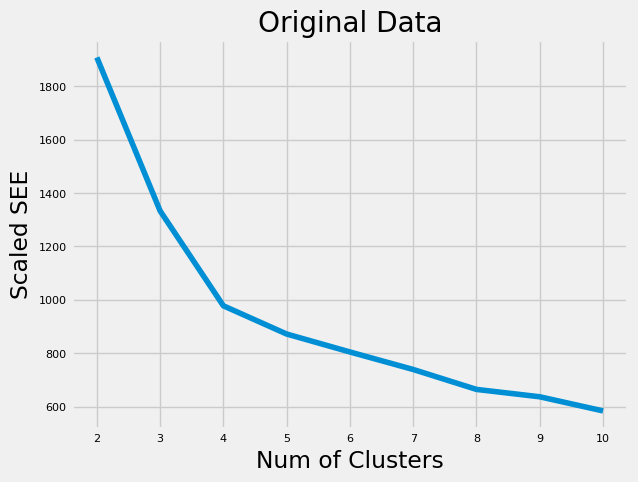

In [53]:
plt.plot(range(2,11),scaled_sse)
plt.xticks(range(2,11))
plt.title('Original Data')
plt.xlabel("Num of Clusters")
plt.ylabel("Scaled SEE")
plt.show()

Scaled Data: Similar to the original data, the SSE declines sharply up to about 4 clusters and then plateaus, suggesting that 4 clusters may be an optimal choice for the scaled data in terms of error minimization.

In [54]:
kneedle = KneeLocator(range(2,11),sse, curve="convex", direction="decreasing")
kneedle.elbow

4

In [55]:
scaled_kneedle = KneeLocator(range(2,11),scaled_sse,curve="convex", direction="decreasing")
scaled_kneedle.elbow

4

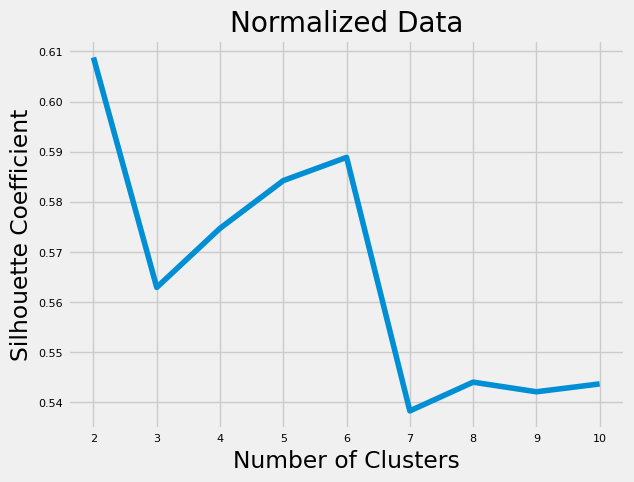

In [56]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.title('Normalized Data')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Normalized Data: The silhouette scores peak at 5 clusters, decreasing significantly as more clusters are added. This indicates that 5 clusters provide the best balance between within-cluster similarity and between-cluster differences in the normalized dataset.

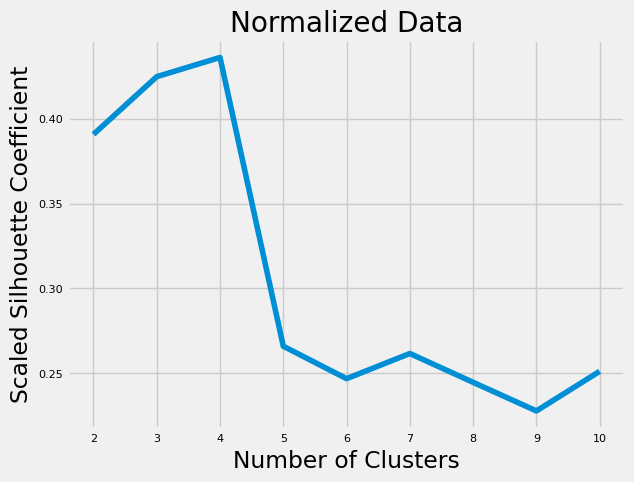

In [57]:
plt.plot(range(2, 11), scaled_silhouette_coefficients)
plt.xticks(range(2,11))
plt.title('Normalized Data')
plt.xlabel("Number of Clusters")
plt.ylabel("Scaled Silhouette Coefficient")
plt.show()

Scaled Data: The silhouette scores are highest at 4 clusters, suggesting that clustering the scaled data into 4 groups maximizes the distinction between clusters while maintaining homogeneity within them.

**Conclusions and Recommendations**

Optimal Number of Clusters: Based on the elbow method observed in the SSE plots and the peak values in the Silhouette Coefficients, 5 clusters are recommended for the original data and 4 for the scaled data.

**ANOVA Analysis**

ANOVA analysis provides a detailed analysis of the clustering characteristics. The objective was to identify which variables significantly differentiate clusters formed from both unscaled and scaled data.

The dataset comprises various housing metrics such as median age, total rooms, bedrooms, population, households, median income, and house value. Clusters were generated using K-Means clustering, and ANOVA was used to determine if the means of these variables are significantly different across clusters.

Two versions of the data were analyzed:

1.   Unscaled Data (housing_df): Original data without any scaling.
2.   Scaled Data (housing_scaled_df): Data where features were scaled to have zero mean and unit variance.

In [58]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    int64  
 1   total_rooms         300 non-null    int64  
 2   total_bedrooms      300 non-null    int64  
 3   population          300 non-null    int64  
 4   households          300 non-null    int64  
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    int64  
 7   labels_k_2          300 non-null    int32  
 8   labels_k_3          300 non-null    int32  
 9   labels_k_4          300 non-null    int32  
dtypes: float64(1), int32(3), int64(6)
memory usage: 20.0 KB


In [59]:
housing_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
 7   labels_k_2          300 non-null    int32  
 8   labels_k_3          300 non-null    int32  
 9   labels_k_4          300 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 20.0 KB


In [60]:
for house in housing_df.columns[:7]:
    print(house)

housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value


In [61]:
def anova_tables(cluster_label, data_frame):
    model = ols(f'{cluster_label} ~ {data_frame.columns[0]}', data=data_frame).fit()
    df_anova =  sm.stats.anova_lm(model,typ=2)
    for i in range(1,7):
        model = ols(f'{cluster_label} ~ {data_frame.columns[i]}', data=data_frame).fit()
        df_anova = pd.concat([df_anova, sm.stats.anova_lm(model,typ=2)])
    df_anova["significant"] = df_anova["PR(>F)"] < .05
    print(cluster_label)
    return df_anova

In [62]:
anova_tables('labels_k_2', housing_df)

labels_k_2


,sum_sq,df,F,PR(>F),significant
housing_median_age,0.458351,1.0,2.385342,1.235393e-01,False
Residual,57.261649,298.0,NaN,NaN,False
total_rooms,0.753493,1.0,3.941629,4.802154e-02,True
Residual,56.966507,298.0,NaN,NaN,False
total_bedrooms,0.107376,1.0,0.555402,4.567060e-01,False
Residual,57.612624,298.0,NaN,NaN,False
population,0.056847,1.0,0.293783,5.882112e-01,False
Residual,57.663153,298.0,NaN,NaN,False
households,0.122198,1.0,0.632228,4.271721e-01,False
Residual,57.597802,298.0,NaN,NaN,False


In [63]:
model = ols('labels_k_2 ~ total_rooms', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_rooms,0.753493,1.0,3.941629,0.048022
Residual,56.966507,298.0,NaN,NaN


In [64]:
model = ols('labels_k_2 ~ median_income', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_income,17.033523,1.0,124.758652,1.979368e-24
Residual,40.686477,298.0,NaN,NaN


In [65]:
model = ols('labels_k_2 ~ median_house_value', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_house_value,38.033046,1.0,575.703485,1.410202e-71
Residual,19.686954,298.0,NaN,NaN


In [66]:
anova_tables('labels_k_3', housing_df)

labels_k_3


,sum_sq,df,F,PR(>F),significant
housing_median_age,1.536659,1.0,3.228002,7.340156e-02,False
Residual,141.860008,298.0,NaN,NaN,False
total_rooms,4.257548,1.0,9.118567,2.749269e-03,True
Residual,139.139119,298.0,NaN,NaN,False
total_bedrooms,1.147049,1.0,2.402964,1.221669e-01,False
Residual,142.249617,298.0,NaN,NaN,False
population,0.107057,1.0,0.222647,6.373757e-01,False
Residual,143.289610,298.0,NaN,NaN,False
households,1.801163,1.0,3.790703,5.247726e-02,False
Residual,141.595504,298.0,NaN,NaN,False


In [67]:
model = ols('labels_k_3 ~ total_rooms', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_rooms,4.257548,1.0,9.118567,0.002749
Residual,139.139119,298.0,NaN,NaN


In [68]:
model = ols('labels_k_3 ~ median_income', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_income,57.292302,1.0,198.283862,7.177450e-35
Residual,86.104365,298.0,NaN,NaN


In [69]:
model = ols('labels_k_3 ~ median_house_value', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_house_value,118.931116,1.0,1448.627655,1.884369e-116
Residual,24.465550,298.0,NaN,NaN


In [70]:
anova_tables('labels_k_4', housing_df)

labels_k_4


,sum_sq,df,F,PR(>F),significant
housing_median_age,0.265190,1.0,0.229739,6.320693e-01,False
Residual,343.984810,298.0,NaN,NaN,False
total_rooms,5.036865,1.0,4.424904,3.625608e-02,True
Residual,339.213135,298.0,NaN,NaN,False
total_bedrooms,1.085366,1.0,0.942518,3.324183e-01,False
Residual,343.164634,298.0,NaN,NaN,False
population,0.010481,1.0,0.009073,9.241781e-01,False
Residual,344.239519,298.0,NaN,NaN,False
households,1.598481,1.0,1.390180,2.393152e-01,False
Residual,342.651519,298.0,NaN,NaN,False


In [71]:
model = ols('labels_k_4 ~ total_bedrooms', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,1.085366,1.0,0.942518,0.332418
Residual,343.164634,298.0,NaN,NaN


In [72]:
model = ols('labels_k_4 ~ median_income', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_income,103.877183,1.0,128.780786,4.775906e-25
Residual,240.372817,298.0,NaN,NaN


In [73]:
model = ols('labels_k_4 ~ median_house_value', data=housing_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_house_value,212.924448,1.0,483.161763,2.556944e-64
Residual,131.325552,298.0,NaN,NaN


In [74]:
anova_tables('labels_k_2', housing_scaled_df)

labels_k_2


,sum_sq,df,F,PR(>F),significant
housing_median_age,3.387425,1.0,33.875112,1.517367e-08,True
Residual,29.799242,298.0,NaN,NaN,False
total_rooms,18.505437,1.0,375.623850,1.033192e-54,True
Residual,14.681230,298.0,NaN,NaN,False
total_bedrooms,18.120553,1.0,358.415224,4.934845e-53,True
Residual,15.066114,298.0,NaN,NaN,False
population,14.535457,1.0,232.240505,3.578145e-39,True
Residual,18.651209,298.0,NaN,NaN,False
households,17.232668,1.0,321.883867,2.567005e-49,True
Residual,15.953999,298.0,NaN,NaN,False


In [75]:
significant_variables_scaled_2 = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]

In [76]:
model = ols('labels_k_2 ~ housing_median_age', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
housing_median_age,3.387425,1.0,33.875112,1.517367e-08
Residual,29.799242,298.0,NaN,NaN


In [77]:
model = ols('labels_k_2 ~ total_rooms', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_rooms,18.505437,1.0,375.62385,1.033192e-54
Residual,14.681230,298.0,NaN,NaN


In [78]:
model = ols('labels_k_2 ~ total_bedrooms', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,18.120553,1.0,358.415224,4.934845e-53
Residual,15.066114,298.0,NaN,NaN


In [79]:
model = ols('labels_k_2 ~ population', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
population,14.535457,1.0,232.240505,3.578145e-39
Residual,18.651209,298.0,NaN,NaN


In [80]:
model = ols('labels_k_2 ~ households', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
households,17.232668,1.0,321.883867,2.567005e-49
Residual,15.953999,298.0,NaN,NaN


In [81]:
model = ols('labels_k_2 ~ median_income', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_income,1.626952,1.0,15.362364,0.00011
Residual,31.559714,298.0,NaN,NaN


In [82]:
model = ols('labels_k_2 ~ median_house_value', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_house_value,0.786214,1.0,7.231124,0.007569
Residual,32.400453,298.0,NaN,NaN


In [83]:
anova_tables('labels_k_3', housing_scaled_df)

labels_k_3


,sum_sq,df,F,PR(>F),significant
housing_median_age,17.988426,1.0,21.534523,5.213104e-06,True
Residual,248.928241,298.0,NaN,NaN,False
total_rooms,46.563728,1.0,62.971663,4.283120e-14,True
Residual,220.352939,298.0,NaN,NaN,False
total_bedrooms,35.448771,1.0,45.638008,7.464676e-11,True
Residual,231.467896,298.0,NaN,NaN,False
population,19.749418,1.0,23.811110,1.733830e-06,True
Residual,247.167249,298.0,NaN,NaN,False
households,36.006551,1.0,46.468091,5.171911e-11,True
Residual,230.910116,298.0,NaN,NaN,False


In [84]:
significant_variables_scaled_3 = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]

In [85]:
model = ols('labels_k_3 ~ total_bedrooms', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,35.448771,1.0,45.638008,7.464676e-11
Residual,231.467896,298.0,NaN,NaN


In [86]:
model = ols('labels_k_3 ~ housing_median_age', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
housing_median_age,17.988426,1.0,21.534523,0.000005
Residual,248.928241,298.0,NaN,NaN


In [87]:
model = ols('labels_k_3 ~ total_rooms', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_rooms,46.563728,1.0,62.971663,4.283120e-14
Residual,220.352939,298.0,NaN,NaN


In [88]:
model = ols('labels_k_3 ~ total_bedrooms', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,35.448771,1.0,45.638008,7.464676e-11
Residual,231.467896,298.0,NaN,NaN


In [89]:
model = ols('labels_k_3 ~ population', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
population,19.749418,1.0,23.81111,0.000002
Residual,247.167249,298.0,NaN,NaN


In [90]:
model = ols('labels_k_3 ~ households', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
households,36.006551,1.0,46.468091,5.171911e-11
Residual,230.910116,298.0,NaN,NaN


In [91]:
model = ols('labels_k_3 ~ median_income', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_income,91.809179,1.0,156.241951,4.129696e-29
Residual,175.107487,298.0,NaN,NaN


In [92]:
model = ols('labels_k_3 ~ median_house_value', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_house_value,92.337998,1.0,157.617901,2.624080e-29
Residual,174.578669,298.0,NaN,NaN


In [93]:
anova_tables('labels_k_4', housing_scaled_df)

labels_k_4


,sum_sq,df,F,PR(>F),significant
housing_median_age,28.246018,1.0,32.198349,3.297625e-08,True
Residual,261.420649,298.0,NaN,NaN,False
total_rooms,3.450375,1.0,3.592429,5.901089e-02,False
Residual,286.216292,298.0,NaN,NaN,False
total_bedrooms,10.086316,1.0,10.750835,1.165787e-03,True
Residual,279.580350,298.0,NaN,NaN,False
population,6.917309,1.0,7.290407,7.328619e-03,True
Residual,282.749358,298.0,NaN,NaN,False
households,8.254881,1.0,8.741477,3.359212e-03,True
Residual,281.411786,298.0,NaN,NaN,False


In [94]:
significant_variables_scaled_4 = ["housing_median_age","total_bedrooms","population","households","median_income","median_house_value"]

In [95]:
model = ols('labels_k_4 ~ housing_median_age', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
housing_median_age,28.246018,1.0,32.198349,3.297625e-08
Residual,261.420649,298.0,NaN,NaN


In [96]:
model = ols('labels_k_4 ~ total_bedrooms', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,10.086316,1.0,10.750835,0.001166
Residual,279.580350,298.0,NaN,NaN


In [97]:
model = ols('labels_k_4 ~ population', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
population,6.917309,1.0,7.290407,0.007329
Residual,282.749358,298.0,NaN,NaN


In [98]:
model = ols('labels_k_4 ~ households', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
households,8.254881,1.0,8.741477,0.003359
Residual,281.411786,298.0,NaN,NaN


In [99]:
model = ols('labels_k_4 ~ median_income', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_income,53.046491,1.0,66.806874,8.663393e-15
Residual,236.620176,298.0,NaN,NaN


In [100]:
model = ols('labels_k_4 ~ median_house_value', data=housing_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
median_house_value,94.236651,1.0,143.696054,2.755330e-27
Residual,195.430016,298.0,NaN,NaN


**Conclusion**

Analysis of Unscaled Data (housing_df)
The analysis of the unscaled data from the California housing dataset reveals that certain variables consistently differentiate clusters across various configurations (k=2 to k=4). Specifically, total_rooms, median_income, and median_house_value have shown significant variability across clusters. These variables maintain p-values below 0.05, highlighting their strong influence in defining distinct groups within the housing market. This consistency suggests that these metrics are pivotal in understanding and clustering housing characteristics based on size, economic status, and property value.

Analysis of Scaled Data (housing_scaled_df)
When examining the scaled version of the dataset, a wider array of variables emerges as significant in distinguishing between clusters. Notably, total_bedrooms, population, and households are among the variables that show significant differences among clusters post-scaling. This observation suggests that scaling enhances the sensitivity of the ANOVA test, allowing for a more nuanced detection of differences among clusters. Scaling helps to highlight the roles of variables that might otherwise be obscured due to their original scales in the unscaled dataset.

Impact of Scaling
The process of scaling not only affects the sensitivity of statistical tests but also alters the scope of significant variables. It reveals how the inherent scale of variables, such as the number of rooms compared to median income, can either mask or amplify their influence on the clustering outcomes. By standardizing the scale across all variables, scaling ensures a more equitable evaluation of each variable's impact, revealing subtler distinctions across clusters that are not detectable in the unscaled data.

**Visual Analysis of Different Clusters**

The visualization of California housing data explores the distribution of three key variables: total_rooms, median_income, and median_house_value across clusters created with K-Means clustering for k=2, k=3, and k=4. These variables were identified as significant differentiators of the clusters through ANOVA tests.

**Original Data**

The dataset used includes various attributes of housing data such as the number of rooms, median income of the area, and house values. The data is segmented into different clusters using the K-Means algorithm, and the clusters are visualized through box plots to compare the distribution of these key variables across different cluster labels.

In [101]:
cluster_labels = ['labels_k_2','labels_k_3','labels_k_4']
significant_variables = ['total_rooms','median_income','median_house_value',]

<ipython-input-102-9d67165ec250>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables[0], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

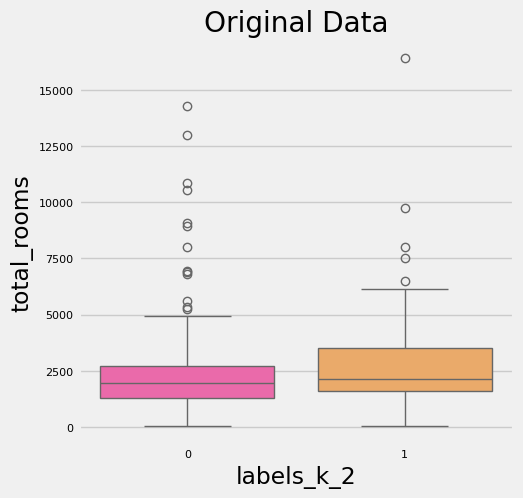

In [102]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables[0], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-103-09a8c342e109>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables[1], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

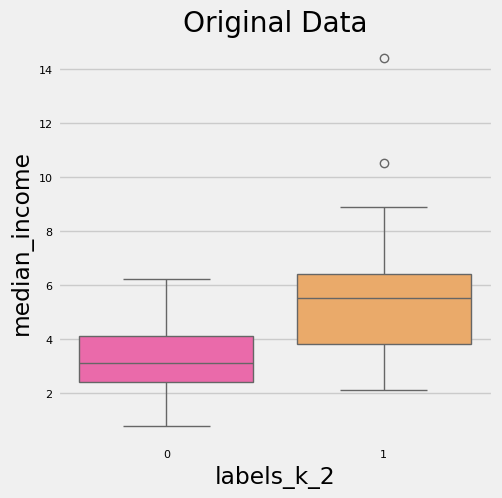

In [103]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables[1], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-104-9a509d62b6a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables[2], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

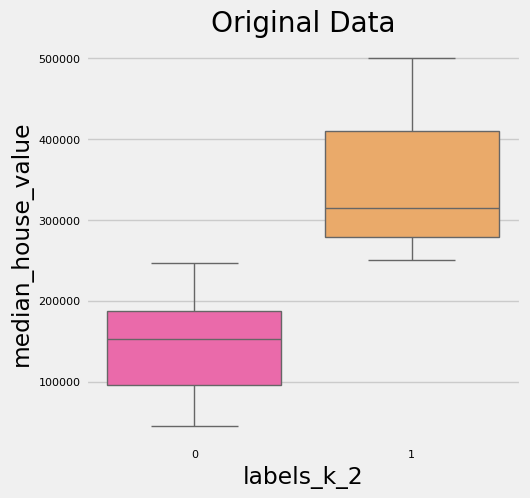

In [104]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables[2], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-105-83e101334367>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables[0], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

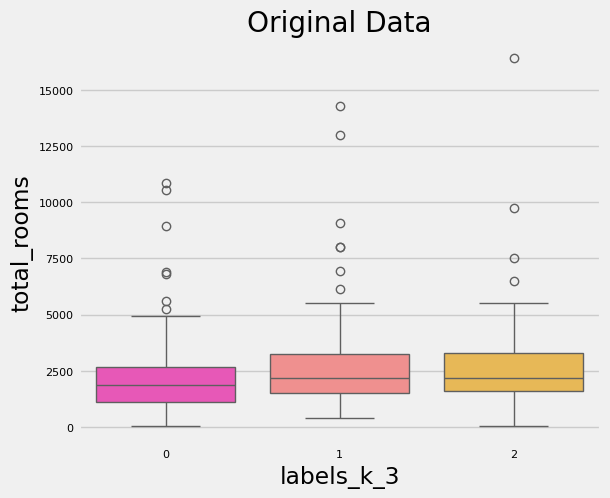

In [105]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables[0], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-106-5d372e45f364>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables[1], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

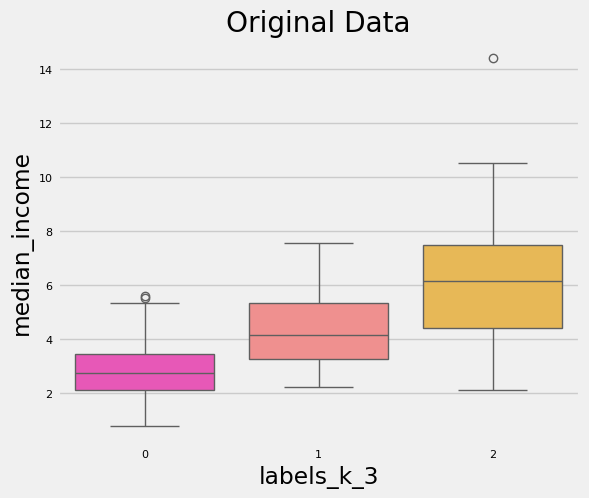

In [106]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables[1], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-107-5864dae70b98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables[2], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

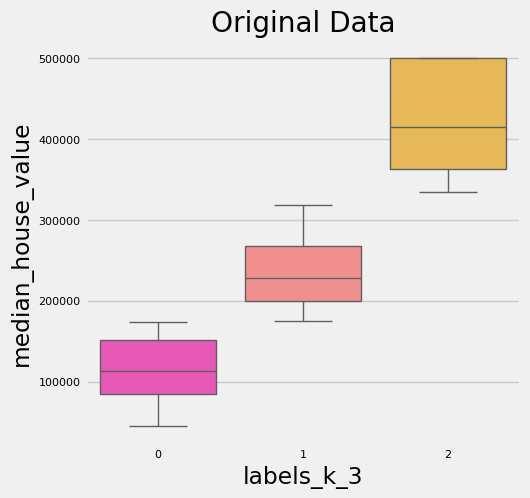

In [107]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables[2], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-108-351b3271bba3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables[0], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

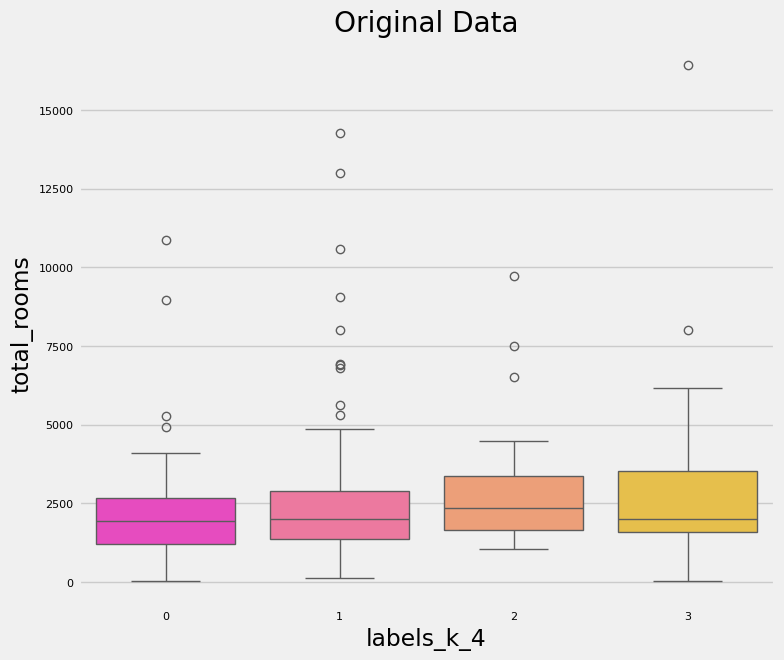

In [108]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables[0], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-109-684da2f249b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables[1], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

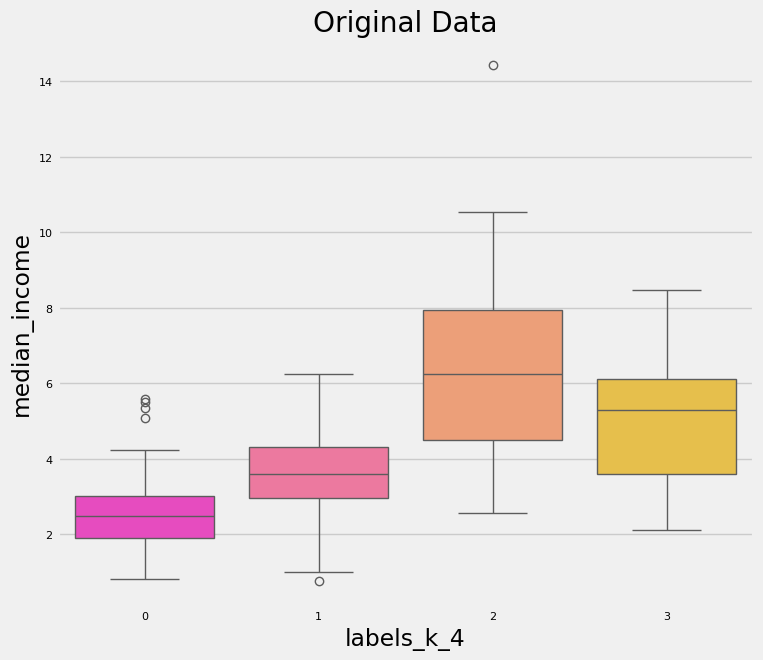

In [109]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables[1], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-110-1a725d7d02f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables[2], data=housing_df, palette='spring')


Text(0.5, 1.0, 'Original Data')

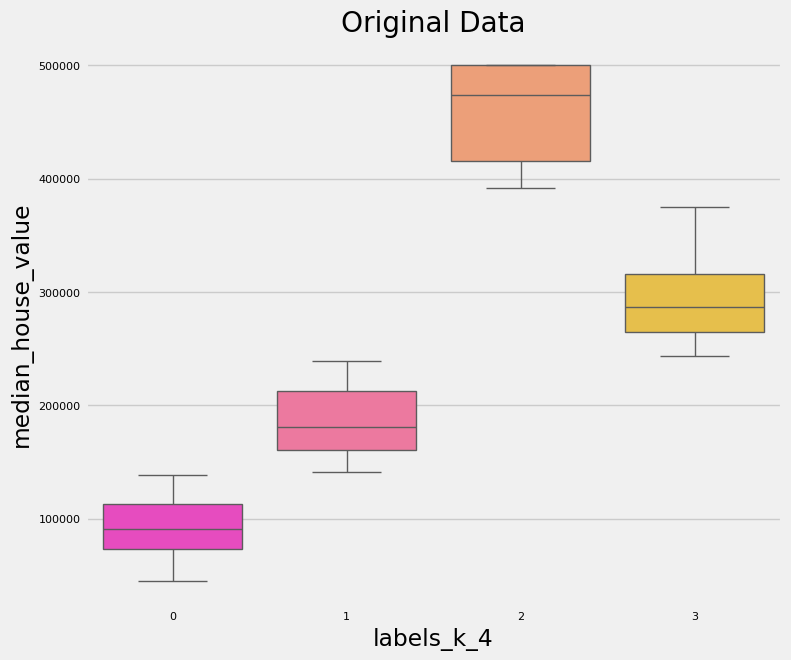

In [110]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables[2], data=housing_df, palette='spring')
plt.title('Original Data')

<ipython-input-127-61b4770965f9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label, y=variable, data=housing_df, ax=axes[i, j], palette='spring')
<ipython-input-127-61b4770965f9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label, y=variable, data=housing_df, ax=axes[i, j], palette='spring')
<ipython-input-127-61b4770965f9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label, y=variable, data=housing_df, ax=axes[i, j], palette='spring')
<ipython-input-127-61b4770965f9>:16: FutureWarning: 

Passing `palette` without assig

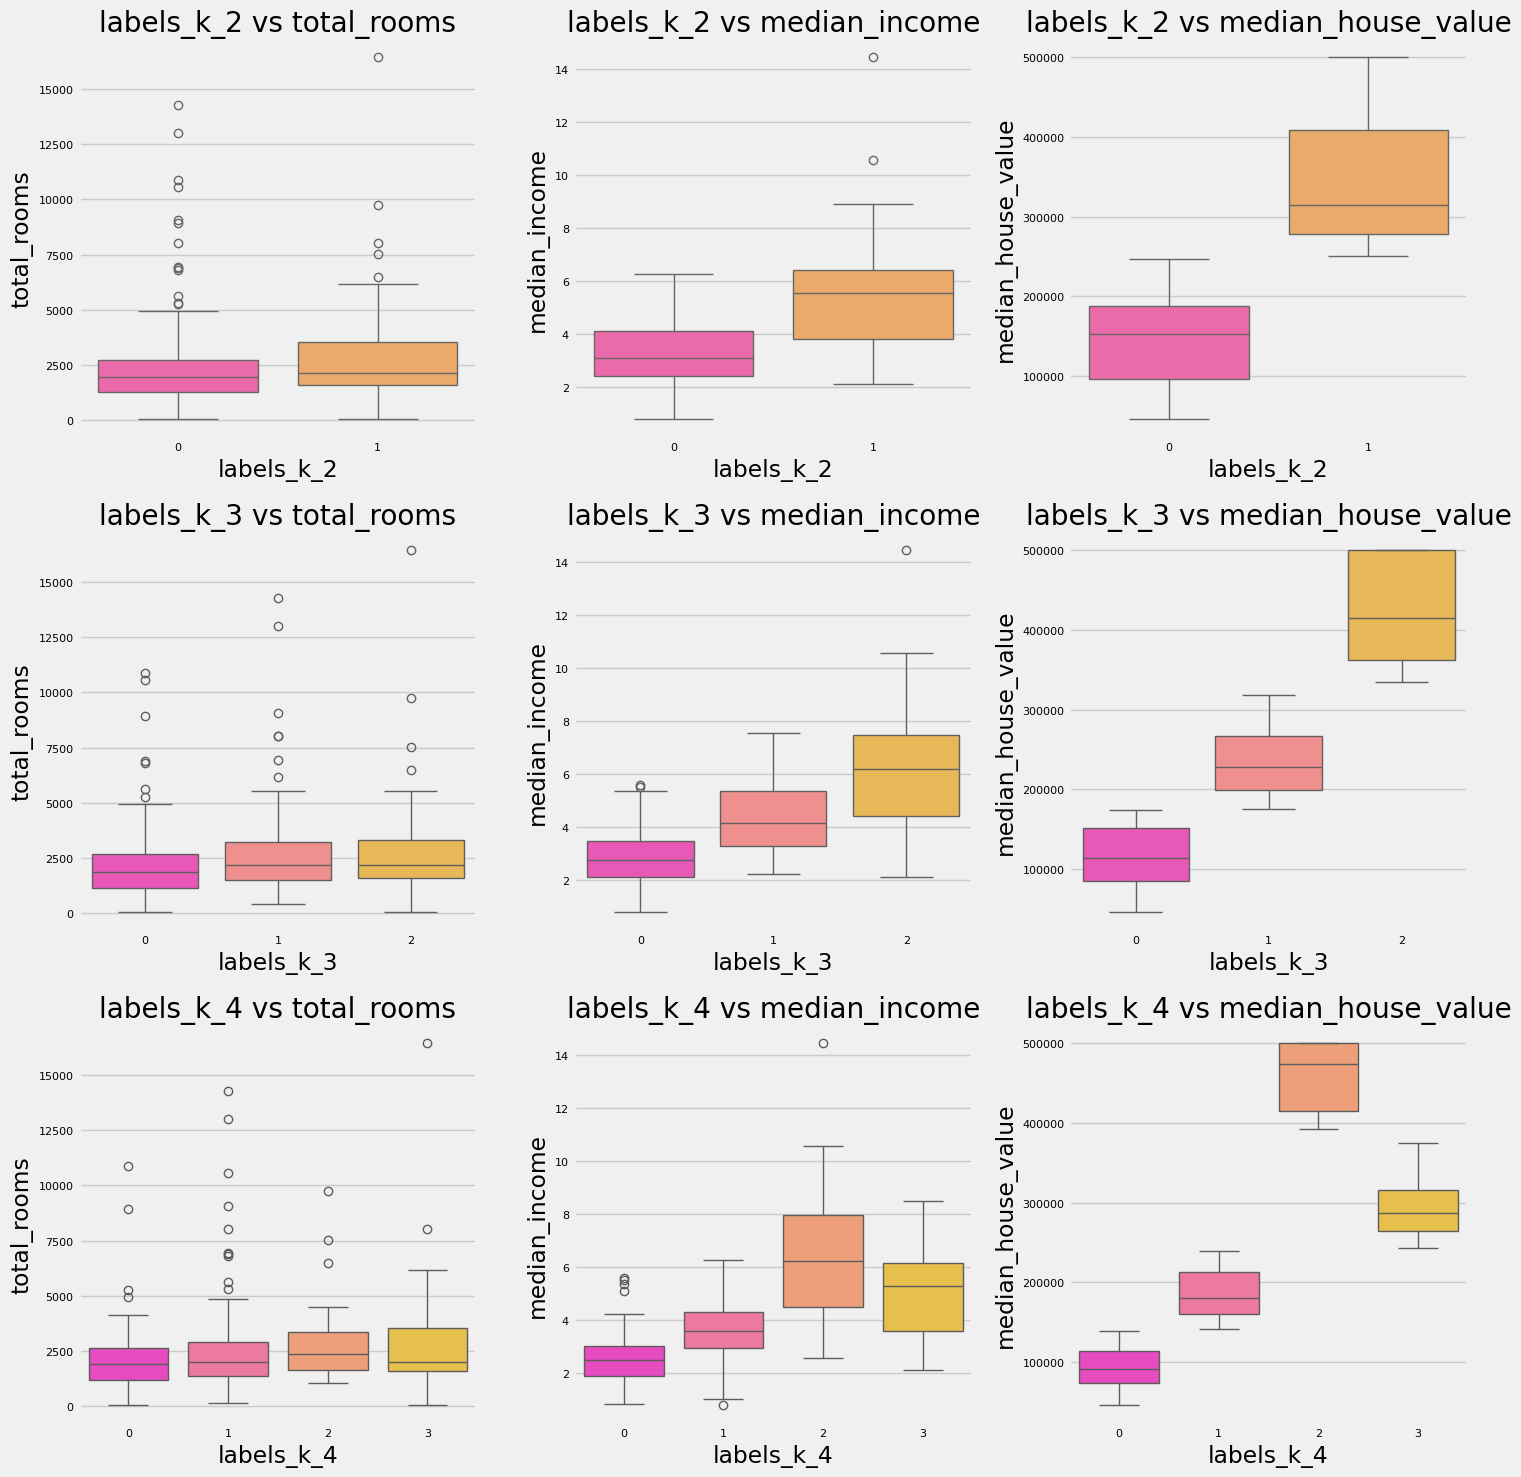

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming housing_df is your DataFrame containing the data

# Define cluster labels and significant variables
cluster_labels = ['labels_k_2', 'labels_k_3', 'labels_k_4']
significant_variables = ['total_rooms', 'median_income', 'median_house_value']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate over cluster labels and significant variables to create box plots
for i, label in enumerate(cluster_labels):
    for j, variable in enumerate(significant_variables):
        sns.boxplot(x=label, y=variable, data=housing_df, ax=axes[i, j], palette='spring')
        axes[i, j].set_title(f'{label} vs {variable}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save or show the combined plot
plt.savefig('combined_plots.png')
plt.show()


**Results**

Total Rooms:
k=2: The box plots show a distinct difference in the distribution of total rooms between the two clusters. Cluster 1 generally has more rooms than cluster 0.
k=3 and k=4: As more clusters are introduced, the variability within clusters decreases, but differences between clusters become more nuanced. For instance, one of the clusters in k=4 displays a higher median but also a wider range of values, indicating a more heterogeneous grouping.

Median Income:
k=2: There's a clear disparity in median income between the two clusters, with cluster 1 displaying a significantly higher median income.
k=3 and k=4: The disparity in median income continues to be evident, with one cluster in k=3 and k=4 showing distinctly higher income levels. This suggests that income is a strong segregating factor in the clustering.

Median House Value:
k=2: Median house values are notably higher in cluster 1 compared to cluster 0.
k=3 and k=4: The trend in house values shows more diversification with increasing k-values. Particularly for k=4, one cluster clearly stands out with much higher house values, while the range of values in other clusters suggests different housing markets.

**Conclusion**

Cluster Characteristics: The analysis of box plots across cluster labels indicates that as the number of clusters increases, the clusters tend to specialize around key features. For instance, one cluster might represent high-income, high-value areas, while another focuses on more moderate economic areas.

Variable Impact: Total rooms, median income, and median house value are consistently shown to influence how the data segments into clusters, corroborating the results from the ANOVA tests.


**Visual Analysis of Different Clusters on the Scaled Data**

This analysis presents visual comparisons of key housing variables (total_bedrooms, population, households) from a normalized version of the California housing dataset, clustered using K-Means for k=2, k=3, and k=4. These variables were highlighted as significant in distinguishing cluster characteristics, particularly in the scaled data which enhances sensitivity to variances across clusters.


**Data and Methodology**

Data Used: The dataset consists of various standardized housing metrics, scaled to have zero mean and unit variance, ensuring that each feature contributes equally to the analysis.

Visualization Approach: Box plots illustrate the distribution of total_bedrooms, population, and households across clusters, providing insights into the spread and central tendency of these variables within each cluster.

In [111]:
cluster_labels = ['labels_k_2','labels_k_3','labels_k_4']
significant_variables_scaled = ['total_bedrooms','population','households',]

<ipython-input-112-ebb4bf2998a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[2], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

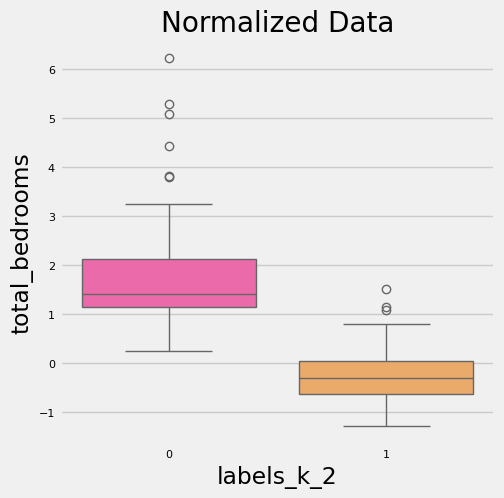

In [112]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[2], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-113-5f3d600d8309>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[3], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

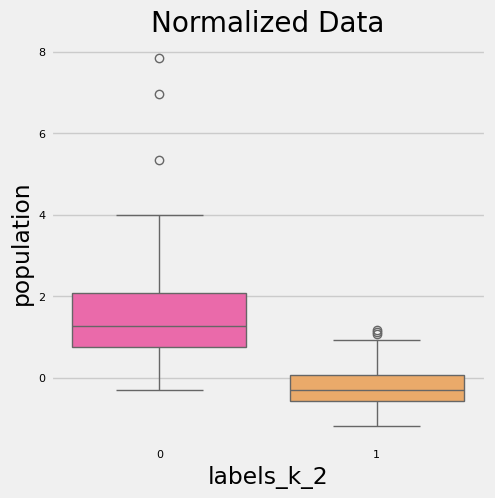

In [113]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[3], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-114-bc4a95e7f29a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[4], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

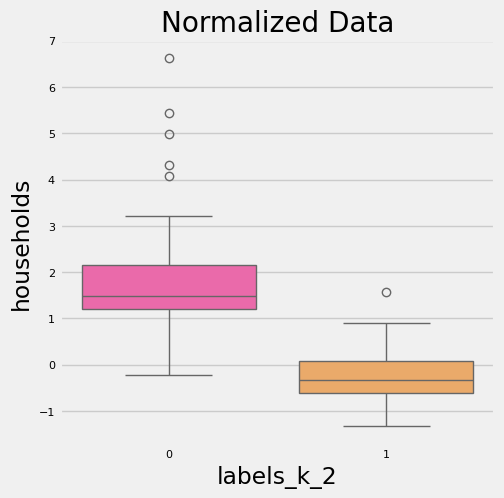

In [114]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[4], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-115-9c997eb1615c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[2], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

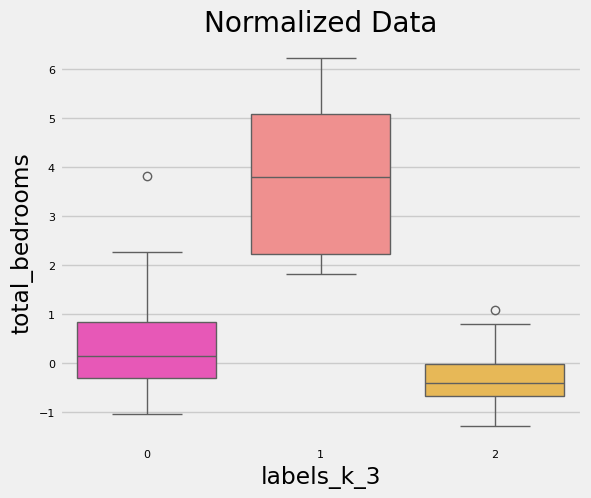

In [115]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[2], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-116-f45ce14856b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[3], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

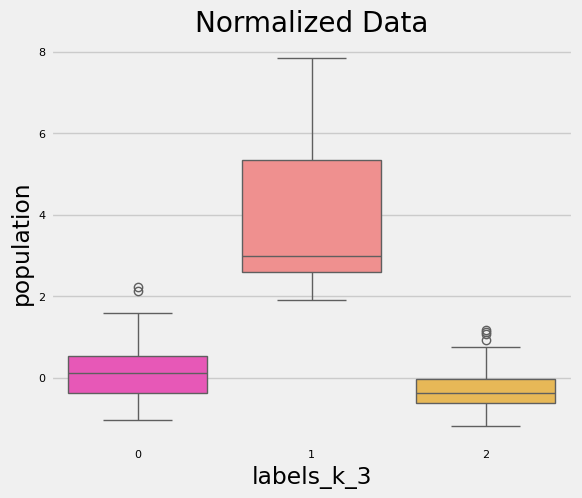

In [116]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[3], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-117-ec0a1e13cb67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[4], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

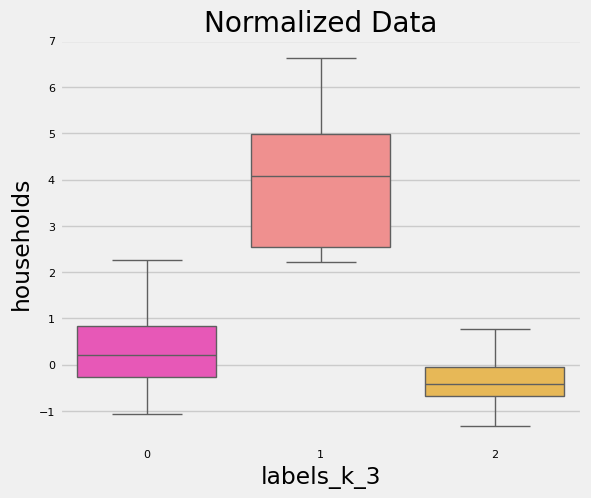

In [117]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[4], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-118-e10e6dc266cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[2], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

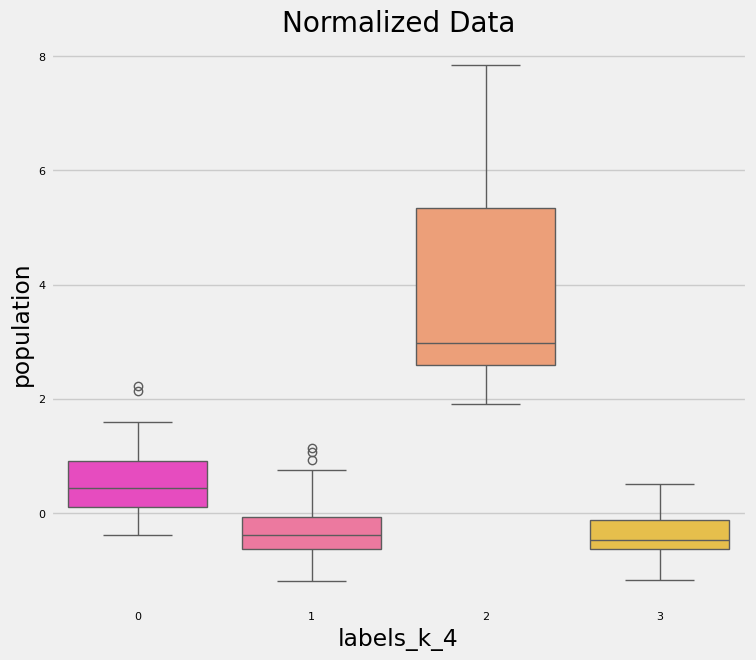

In [118]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[2], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-119-79f12e1b05a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[3], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

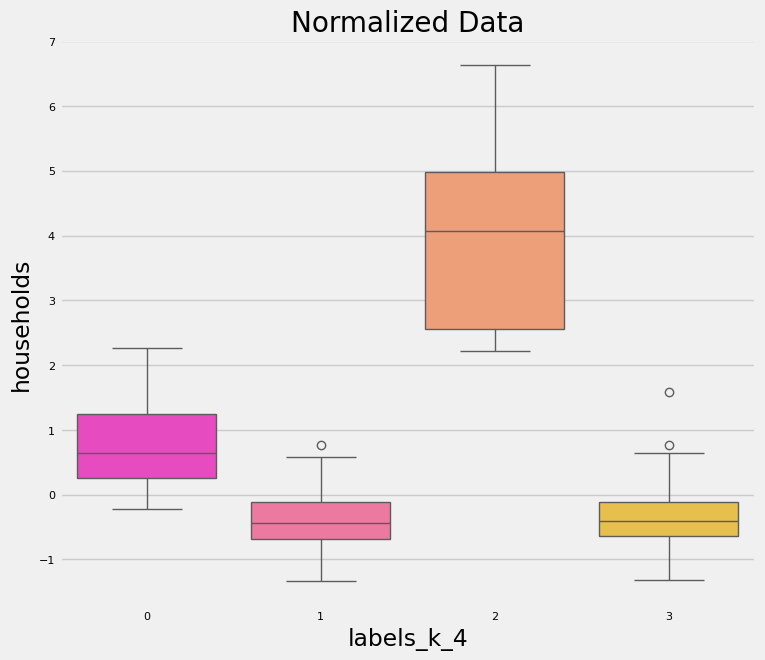

In [119]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[3], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-120-1ec8f2acc8dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[4], data=housing_scaled_df, palette='spring')


Text(0.5, 1.0, 'Normalized Data')

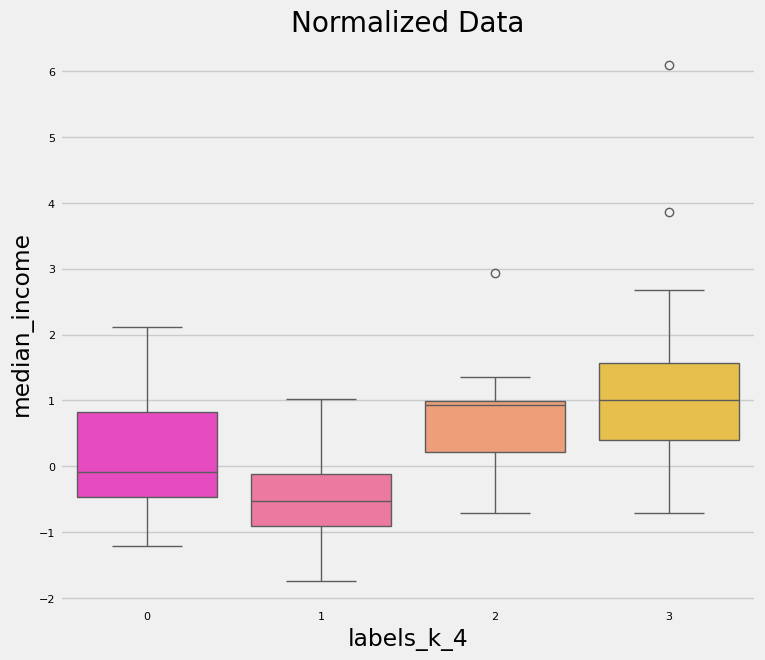

In [120]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[4], data=housing_scaled_df, palette='spring')
plt.title('Normalized Data')

<ipython-input-128-de73d14af14b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label, y=variable, data=housing_scaled_df, ax=axes[i, j], palette='spring')
<ipython-input-128-de73d14af14b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label, y=variable, data=housing_scaled_df, ax=axes[i, j], palette='spring')
<ipython-input-128-de73d14af14b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label, y=variable, data=housing_scaled_df, ax=axes[i, j], palette='spring')
<ipython-input-128-de73d14af14b>:16: FutureWarning: 

Passing `p

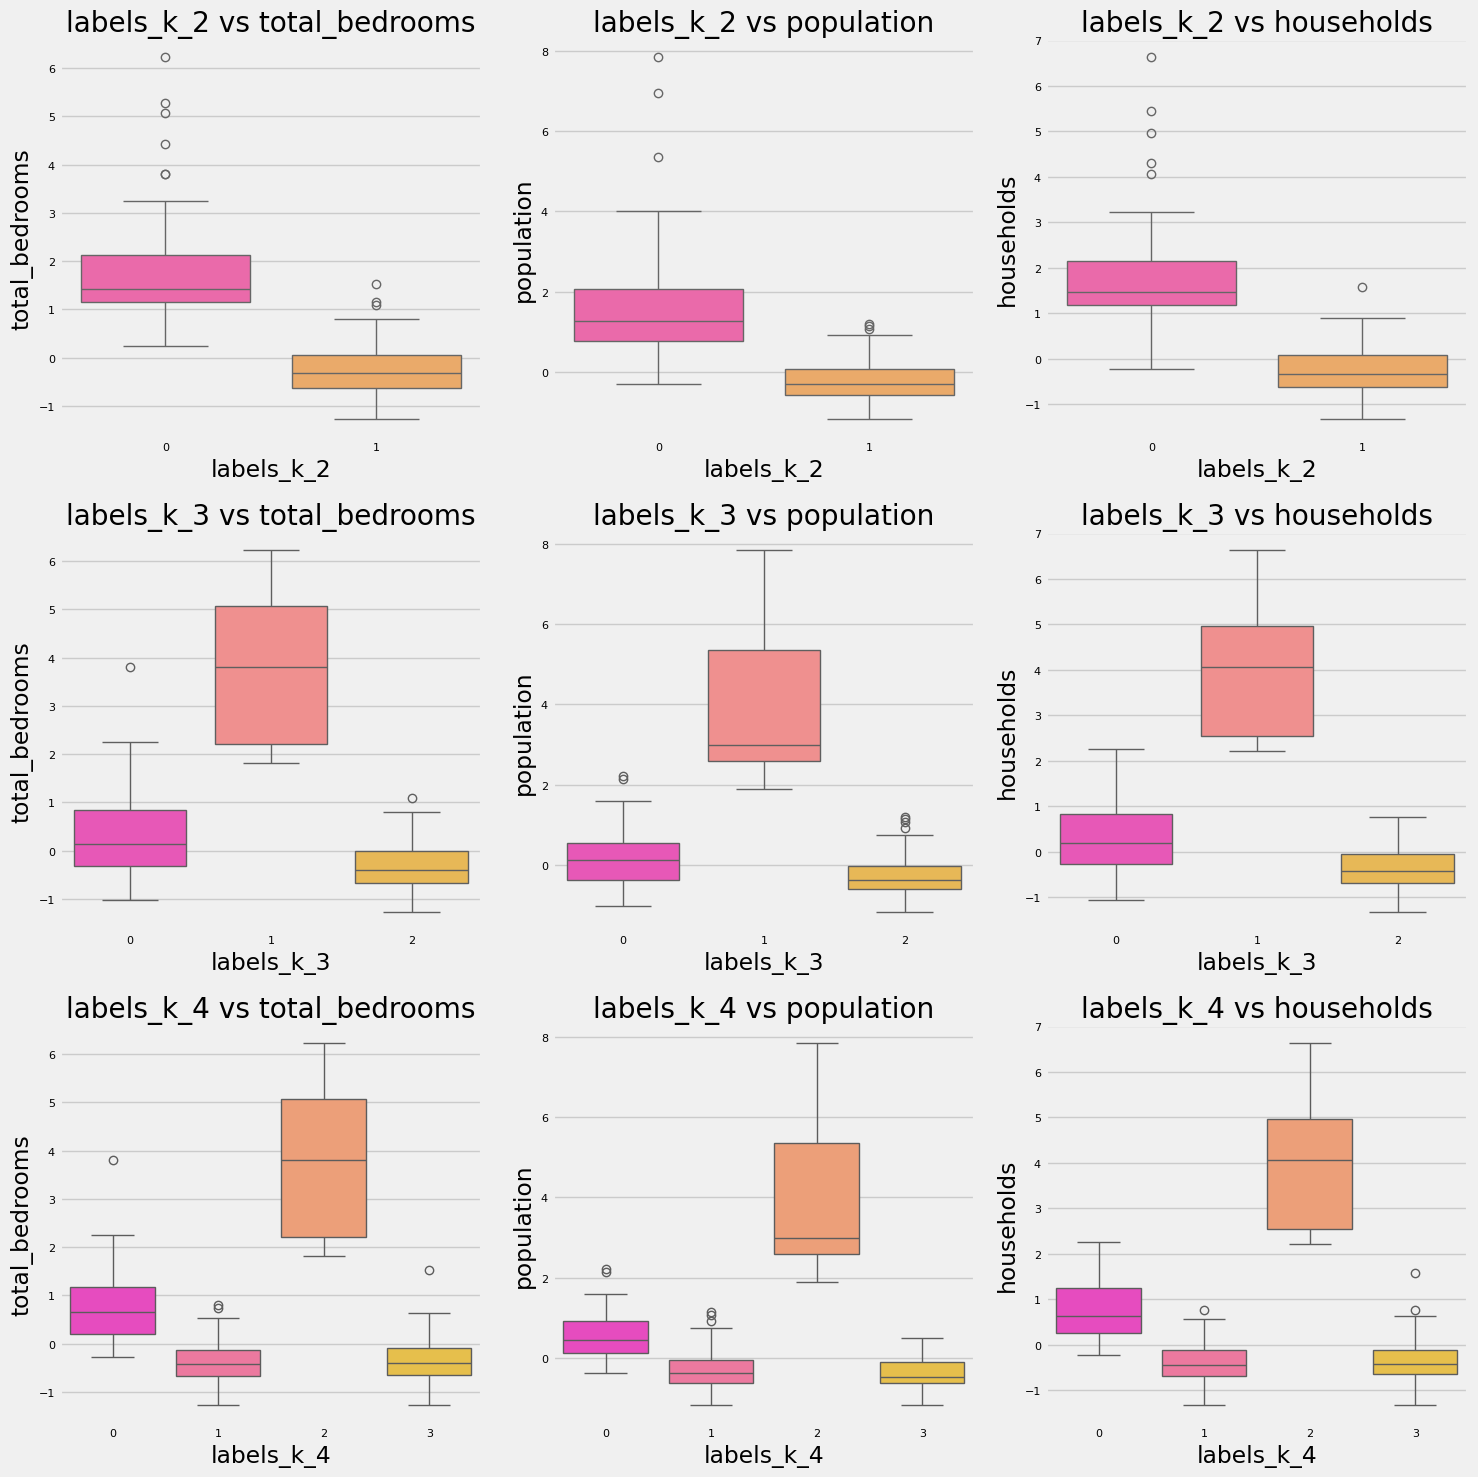

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming housing_scaled_df is your DataFrame containing the scaled data

# Define cluster labels and significant variables
cluster_labels = ['labels_k_2', 'labels_k_3', 'labels_k_4']
significant_variables_scaled = ['total_bedrooms', 'population', 'households']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate over cluster labels and significant variables to create box plots
for i, label in enumerate(cluster_labels):
    for j, variable in enumerate(significant_variables_scaled):
        sns.boxplot(x=label, y=variable, data=housing_scaled_df, ax=axes[i, j], palette='spring')
        axes[i, j].set_title(f'{label} vs {variable}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save or show the combined plot
plt.savefig('combined_plots_scaled.png')
plt.show()


Results

Total Bedrooms:
k=2: Clear differences are observed between the two clusters, with Cluster 0 typically showing fewer bedrooms compared to Cluster 1.
k=3 and k=4: The introduction of more clusters reveals more granular distinctions. Cluster 0 consistently shows fewer bedrooms, while other clusters vary more widely in their bedroom counts.

Population:
k=2: Cluster 0 has a noticeably lower population than Cluster 1, suggesting it may represent less densely populated areas.
k=3 and k=4: The population spread becomes more differentiated, with one cluster (e.g., Cluster 1 in k=4) showing significantly higher population figures, indicating high-density regions.

Households:
k=2: Similar to population, households in Cluster 0 are notably fewer than those in Cluster 1, aligning with the lower population and possibly smaller or less dense housing areas.
k=3 and k=4: Distributions show varied household sizes, with some clusters indicating larger household sizes possibly reflective of family-dense or communal living areas.


Conclusion

The normalization of data prior to clustering enhances the ability to detect subtle differences across clusters, which might be masked in unnormalized data due to scale disparities among variables.

**Conclusion**

The cluster analysis conducted on the California housing market data using both hierarchical and K-means clustering methods has provided key insights into the regional housing sector's characteristics and economic aspects. Our analysis identified distinct clusters that varied significantly in crucial variables such as total rooms, median income, and median house value. These variables were instrumental in distinguishing different groups within the housing market, each characterized by specific traits.

In our hierarchical clustering analysis on the original data, we identified approximately 2-3 significant clusters using Ward's method, which was particularly effective in minimizing within-cluster variance and producing actionable clusters. However, when we applied hierarchical clustering to the standardized data, the results indicated a more refined structure, typically showing 3-4 well-defined clusters, especially in methods like average linkage and Ward's method. This suggests that standardization of data helps in achieving a more nuanced differentiation between clusters.

Similarly, the K-means clustering analysis on the original data suggested that an optimal number of clusters ranged from 2 to 5, based on the elbow method observed in the SSE plots. When we shifted to the standardized data, the silhouette coefficients suggested that clustering the data into 4 groups maximized the distinction between clusters while maintaining homogeneity within them. This indicates that scaling the data changes the perception of cluster cohesion and separation, highlighting the impact of feature scale on the clustering outcomes.
